# Training Word Embeddings with gensim Word2Vec

In [1]:
import re, pickle

import gensim, nltk, regenerator
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/idfah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_stream = regenerator.Stream.from_txt('wikipedia.txt') #.islice(10_1000)
data_stream = data_stream.map(lambda line: line.strip('\r\n')).filter(lambda item: item)
list(data_stream.islice(3))

['Anarchism',
 "Anarchism is an anti-authoritarian political and social philosophy that rejects hierarchy as unjust and advocates its replacement with self-managed, self-governed societies based on voluntary, cooperative institutions. These institutions are often described as stateless societies, although several authors have defined them more specifically as distinct institutions based on non-hierarchical or free associations. Anarchism's central disagreement with other ideologies is that it holds the state to be undesirable, unnecessary, and harmful.",
 'Anarchism is usually placed on the far-left of the political spectrum, and much of its economics and legal philosophy reflect anti-authoritarian interpretations of communism, collectivism, syndicalism, mutualism, or participatory economics. As anarchism does not offer a fixed body of doctrine from a single particular worldview, many anarchist types and traditions exist and varieties of anarchy diverge widely. Anarchist schools of tho

In [4]:
class Tokenizer:                                                                                    
    def __init__(self, language='english'):
        self.language = language
        
        #self.nltk_word_tokenizer = nltk.tokenize.WordPunctTokenizer()
        self.nltk_word_tokenizer = nltk.tokenize.TreebankWordTokenizer()
        self.nltk_sent_tokenizer = nltk.data.load(
            'tokenizers/punkt/{}.pickle'.format(language))
                                                                                                    
    def __call__(self, text):
        return [self.nltk_word_tokenizer.tokenize(sent)
                for sent in self.nltk_sent_tokenizer.tokenize(text)]

In [5]:
tokenizer = Tokenizer()

In [6]:
token_stream = data_stream.map(tokenizer).unnest()
list(token_stream.islice(5))

[['Anarchism'],
 ['Anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['These',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['Anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['Anarchism',
  'is',
  'usually',
  '

In [7]:
lower_token_stream = token_stream.map(lambda line: list(map(str.lower, line)))
list(lower_token_stream.islice(5))

[['anarchism'],
 ['anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['these',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['anarchism',
  'is',
  'usually',
  '

In [8]:
vocab_size = 150_000
embed_dim = 96

In [9]:
counts = collections.Counter(lower_token_stream.unnest())
len(counts)

10373727

In [10]:
most_common_words = counts.most_common(vocab_size)
most_common_words[:10]

[('the', 158744676),
 (',', 127369086),
 ('.', 101325279),
 ('of', 74563192),
 ('in', 64654731),
 ('and', 64030532),
 ('a', 46463660),
 ('to', 45261934),
 ('was', 27922337),
 ("''", 25539396)]

In [11]:
del counts

In [12]:
min_count = most_common_words[-1][1]
min_count

235

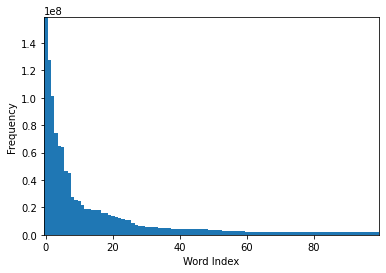

In [13]:
words, counts = zip(*most_common_words[:100])

plt.bar(range(len(counts)), counts, width=1.0);
plt.autoscale(tight=True);
plt.xlabel('Word Index');
plt.ylabel('Frequency');

In [14]:
vocab = set(word for word, count in most_common_words)
vocab

{'heydon',
 'skeletal',
 'throwdown',
 '83rd',
 'unprecedented',
 'tolerate',
 'station',
 'mix',
 'wintered',
 'sautéed',
 'gallaher',
 'expectant',
 'pitzer',
 'ex-con',
 'fyn',
 'lathi',
 'higley',
 'suspending',
 'airwork',
 'finnie',
 'ringlet',
 'summarise',
 'parent-teacher',
 'emetic',
 'graney',
 'btk',
 'pula',
 'telemann',
 'kogami',
 '1.70',
 'hksar',
 'udon',
 '18m',
 'mourning',
 'obtains',
 'bloomingdale',
 'walkers',
 'flotation',
 'neuroplasticity',
 'świętokrzyski',
 'crevasse',
 '14–6',
 'bloodied',
 'tinubu',
 'sobhan',
 'fatherly',
 'médecine',
 'w-league',
 '23-year',
 'ethology',
 'stewardship',
 'alek',
 'sa-2',
 'laurel',
 'bruno',
 'lazarević',
 '8x8',
 'snh',
 'dysfunction',
 'bellas',
 'trudi',
 'noticeably',
 'minus',
 'lawlessness',
 'wittlich',
 'mamelodi',
 'kuvempu',
 'kongsvinger',
 'ocm',
 'yanina',
 'taunted',
 'rhythmical',
 'synapsids',
 'butternut',
 'sepulveda',
 'sheldrake',
 'purebred',
 'picnicking',
 'viana',
 'clip-on',
 'sura',
 'eddystone'

In [15]:
def replace_word(word):
    if word.isdigit():
        return '<num>'
    
    if not word in vocab:
        return '<unk>'
    
    return word

sub_lower_token_stream = lower_token_stream.map(lambda sent: list(map(replace_word, sent)))

In [16]:
list(sub_lower_token_stream.islice(50))

[['anarchism'],
 ['anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['these',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['anarchism',
  'is',
  'usually',
  '

In [17]:
with open('tokenized.txt', mode='w', encoding='utf8') as fh:
    for i, sent in enumerate(sub_lower_token_stream):
        fh.write(' '.join(sent) + '\n')

In [18]:
sent_stream = regenerator.Stream.from_txt('tokenized.txt').map(str.split)
list(sent_stream.islice(5))

[['anarchism'],
 ['anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['these',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['anarchism',
  'is',
  'usually',
  '

In [19]:
model = gensim.models.Word2Vec(                                                                 
    sent_stream,
    size=embed_dim,
    window=5,
    min_count=min_count,
    workers=20,
    iter=20)

In [20]:
model.wv.most_similar('luke')

[('matthew', 0.841063380241394),
 ('dominic', 0.8093958497047424),
 ('aidan', 0.8021012544631958),
 ('damian', 0.7852156758308411),
 ('patrick', 0.7690656185150146),
 ('brendan', 0.7618938088417053),
 ('michael', 0.760992169380188),
 ('jake', 0.7574337124824524),
 ('aiden', 0.7554619908332825),
 ('jonah', 0.7547607421875)]

In [21]:
test_words = ['space', 'trump', 'obama', 'apollo', 'the', 'is', 'and', 'cat', 'elliott', ',',   
              'maggie', '.', '99', 'bksdhjfbhyjk', 'america', 'canada', 'omega', 'pytorch']

for word in test_words:
    word = replace_word(word)
        
    similar, _scores = zip(*model.wv.most_similar(word))
    print(word, end=': ')
    print(similar)
    print()

space: ('spaces', 'module', 'workspace', 'projection', 'iss', 'torus', 'climate-controlled', 'shuttle', 'airlock', 'storage')

trump: ('obama', 'reagan', 'biden', 'nixon', 'rumsfeld', 'clinton', 'putin', 'barack', 'mccain', 'ahmadinejad')

obama: ('trump', 'reagan', 'barack', 'clinton', 'nixon', 'ahmadinejad', 'eisenhower', 'biden', 'mccain', 'bush')

apollo: ('gemini', 'orion', 'artemis', 'helios', 'poseidon', 'daedalus', 'neptune', 'athena', 'voyager', 'nimrod')

the: ('its', 'this', "'s", 'their', 'a', 'another', 'his', 'an', 'whose', 'our')

is: ('was', 'exists', 'are', 'becomes', 'became', 'represents', 'remains', 'stands', 'occurs', 'contains')

and: ('while', '.', 'who', 'which', 'whilst', 'whose', 'whereas', 'where', 'including', 'meanwhile')

cat: ('rabbit', 'dog', 'monkey', 'rat', 'pug', 'kitten', 'pet', 'frog', 'toad', 'spider')

elliott: ('dixon', 'bennett', 'taylor', 'dunn', 'mitchell', 'willis', 'russell', 'stewart', 'haynes', 'boyd')

,: ('(', 'in', '-', ';', 'respective

In [22]:
model.wv.index2word[:10], len(model.wv.index2word)

(['the', ',', '.', 'of', '<unk>', 'in', 'and', '<num>', 'a', 'to'], 147821)

In [23]:
model.wv.vectors, model.wv.vectors.shape

(array([[-0.9633,  0.1733,  5.46  ,  1.1779, ...,  1.2496, -2.3152,
          1.2638,  4.3903],
        [-1.2013,  2.4695,  2.8256,  1.1768, ...,  0.3738,  1.6201,
         -0.5504,  0.5684],
        [ 0.4011,  1.1636, -0.1853,  3.0202, ...,  1.3841, -2.7392,
         -2.7168, -0.8806],
        [-1.8551, -1.533 ,  5.4407,  4.1231, ..., -2.5591, -0.8662,
         -4.3964,  5.0934],
        ...,
        [-1.0662,  0.5649, -1.1928,  0.4068, ...,  0.5337, -0.4509,
         -0.4071, -1.2405],
        [ 0.8048, -0.438 , -1.9612, -0.3643, ..., -0.2061, -0.1507,
         -0.7795,  1.2558],
        [ 2.9279, -0.4254,  0.2099, -0.1151, ...,  0.1845,  2.0849,
          1.4984,  1.4094],
        [ 0.1248,  1.2601,  1.561 , -0.2432, ..., -0.0124,  0.3568,
         -0.9114, -1.9995]], dtype=float32), (147821, 96))

In [24]:
filename = f'wikipedia-cbow-{embed_dim}d-{vocab_size // 1000}k.txt'

with open(filename, mode='w', encoding='utf8') as fh:
    for word, vector in zip(model.wv.index2word, model.wv.vectors):
        str_vector = ' '.join(str(round(val, 12)) for val in vector)
        fh.write(f'{word} {str_vector}\n')

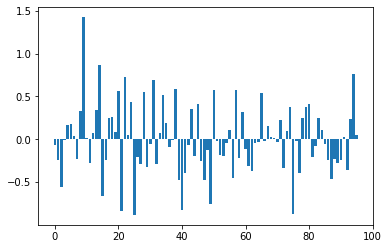

In [25]:
plt.bar(range(embed_dim), model.wv.vectors.mean(axis=0));

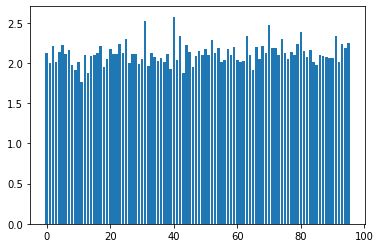

In [26]:
plt.bar(range(embed_dim), model.wv.vectors.std(axis=0));